#Problem Statement
The problem statement involves developing a sentiment-based product recommendation system for an e-commerce company named 'Ebuss.' The goal is to enhance user recommendations by analyzing past reviews and ratings. The project encompasses several key tasks:

**Data Analysis and Preprocessing:** The project begins with exploring and cleaning a dataset containing over 30,000 reviews across various products and from more than 25,000 users. Text preprocessing techniques are applied to convert the textual data into numerical representations suitable for machine learning.

**Sentiment Analysis Model:** Multiple machine learning models, such as Logistic Regression, Random Forest, XGBoost, and Naive Bayes, are trained to predict the sentiment of reviews. The most effective model is chosen based on its performance, and its sentiments analysis capability is integrated into the project.

**Recommendation System Development:** Two types of recommendation systems, user-based and item-based, are evaluated to determine the best approach for suggesting products to users. Collaborative filtering techniques are employed to build the selected recommendation system.

**Enhancing Recommendations with Sentiment Analysis:** The sentiment analysis model is combined with the recommendation system. User reviews' sentiment scores influence the ranking of recommended products, ensuring that the most positively reviewed products are prioritized.

**Deployment and User Interface:** The complete project, including the sentiment analysis model and recommendation system, is deployed using the Flask framework. The user interface allows users to input their username, and upon submission, they receive a list of five product recommendations based on sentiment-influenced ranking.

The primary focus is on creating an end-to-end solution that offers personalized product recommendations by leveraging sentiment analysis and collaborative filtering techniques. The project aims to elevate Ebuss's position in the competitive e-commerce market by providing users with tailored suggestions based on their preferences and reviews.





In [ ]:
# import statements
# Disable all warnings
import warnings
warnings.filterwarnings("ignore")
!pip install pandas_profiling
!pip install swifter
import pandas as pd
from pandas_profiling import ProfileReport
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
import string
import swifter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 16.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=359ca485481272905fc24ebb0faa89ada842c3083187c5ac6d8e78b3e95699ec
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.1.1
    Uninstalling pydantic-2.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Import datasets

In [ ]:
# Load the dataset
data_path = '/content/drive/MyDrive/sample30.csv'  # Update with the actual path
df = pd.read_csv(data_path)
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


## Exploratory analysis.
Use pandas profiling for exploratory analysis

In [ ]:
# Generate a profile report
profile = ProfileReport(df, title='Dataset Profiling Report', explorative=True)

# Display the report in the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Observations from Pandas Profiling

1.   There are 15 fields in the dataset.
2.   There are 30000 records in the dataset
3.   There are 9 fields with null or missing values that need to be fixed.
4.   There are 12 categorical fields, 1 date field and 2 boolean fields.
5.   id has a high cardinality: 271 distinct values	High cardinality.
6.   brand has a high cardinality: 214 distinct values	High cardinality
7.   categories has a high cardinality: 270 distinct values	High cardinality
8.   manufacturer has a high cardinality: 227 distinct values	High cardinality
9.   name has a high cardinality: 271 distinct values	High cardinality
10.  reviews_date has a high cardinality: 6857 distinct values	High cardinality
11.  reviews_text has a high cardinality: 27282 distinct values	High cardinality
12.  reviews_title has a high cardinality: 18535 distinct values	High cardinality
13.  reviews_userCity has a high cardinality: 977 distinct values	High cardinality
14.  reviews_username has a high cardinality: 24914 distinct values	High cardinality


### Let us analyse fields with missing value and handle them.



####reviews_didPurchase

A boolean field indicating if the customer performing review purchased the product.
This field has **14068 (46.9%)** missing values.
This field has a huge imbalance in the values between true and false.
It would have been a good field to include in sentiment analysis if it did not have so many missing values. Lets drop this field.

In [ ]:
df=df.drop('reviews_didPurchase',axis=1)

####reviews_doRecommend

A boolean field indicating if the customer performing review recommends the product.
This field has **2570 (8.6%)** missing values.
This field has a huge imbalance in the values between true and false.
It would have been a good field to include in sentiment analysis if it did not have so many missing values. Lets drop this field.

In [ ]:
df=df.drop('reviews_doRecommend',axis=1)

###reviews_userCity
Field indicating the city from which the review was written. Basically the user's city. The field has very high cardinality and missing values.
It has **28071 (93.6%)** missing values. Drop the field.


In [ ]:
df=df.drop('reviews_userCity',axis=1)

###reviews_userProvince
Field indicating the province from which the review was written. Basically the user's province. The field has very high cardinality and missing values.
It has **29830 (99.4%)** missing values. Drop the field.

In [ ]:
df=df.drop('reviews_userProvince',axis=1)

###user_sentiment
This is the target variable to train our sentiment analysis model
There is 1 missing value. Let us simply read through the review and manually impute the data.


In [ ]:
pd.set_option('display.max_colwidth', None)
print(df[df['user_sentiment'].isnull()]['reviews_text'])

28354    my kids absolutely loved this film so much that we watched it twice. Having a digital copy means that every time we get in the car we get to watch it wherever we go. we even got to use our $5 reward coupon towards the purchase of this movie so we got an additional $5 off + we got to add the points towards our next rewards coupon we love the savings we get at Best Buy
Name: reviews_text, dtype: object


Based on the manual inspection of the review, we can conclude that it is positive. Lets impute this value to the dataframe.

In [ ]:
df['user_sentiment']=df['user_sentiment'].fillna('Positive')

In [ ]:
df.loc[(df.user_sentiment.isnull())]

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment


Let us now map positive to 1 and negative to 0

In [ ]:
# map the categorical user_sentiment to numerical 1 or 0 for modelling
df['user_sentiment'] = df['user_sentiment'].map({'Positive':1,'Negative':0})

###Observation
There is an imbalance in **positive(89%) to negative(11%)** reviews. We may have to handle this during training using **SMOTE**.

###reviews_username
The field has 63 missing values. Lets impute the missing values as UnknownUser for these.

In [ ]:
df['reviews_username']=df['reviews_username'].fillna('UnknownUser')

In [ ]:
df.loc[(df.reviews_username.isnull())]

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment


###reviews_title
There are 190 missing values. We observe that positive sentiments are represented with the words like Great and negative ones are represented with words like Dissapointed. Lets impute the data with 'Good' for positive sentiment and 'Bad' for negative sentiment

In [ ]:
df.loc[(df['reviews_title'].isnull()) & (df['user_sentiment']==1),'reviews_title']='Good'

In [ ]:
df.loc[(df['reviews_title'].isnull()) & (df['user_sentiment']==0),'reviews_title']='Bad'

###manufacturer
There are 141 missing values. Let us impute this field with UnknownManufacturer as the value.

In [ ]:
df['manufacturer']=df['manufacturer'].fillna('UnknownManufacturer')

###reviews_date
Lets first convert the field to datetime. Its currently in string format.
46 missing values are present.
We can use the data from other fields in these records. Lets impute the date 1900-01-01 for these missing values.

In [ ]:
df.reviews_date=pd.to_datetime(df.reviews_date, errors='coerce')

In [ ]:
df['reviews_date']=df['reviews_date'].fillna('1900-01-01')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                30000 non-null  object             
 1   brand             30000 non-null  object             
 2   categories        30000 non-null  object             
 3   manufacturer      30000 non-null  object             
 4   name              30000 non-null  object             
 5   reviews_date      30000 non-null  datetime64[ns, UTC]
 6   reviews_rating    30000 non-null  int64              
 7   reviews_text      30000 non-null  object             
 8   reviews_title     30000 non-null  object             
 9   reviews_username  30000 non-null  object             
 10  user_sentiment    30000 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 2.5+ MB


#Bi variate Analysis

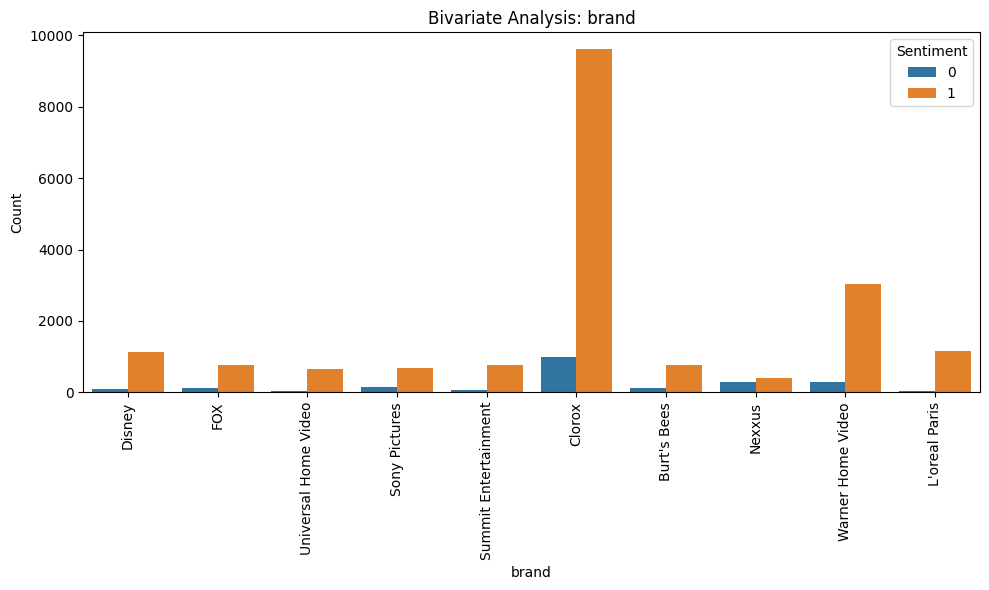

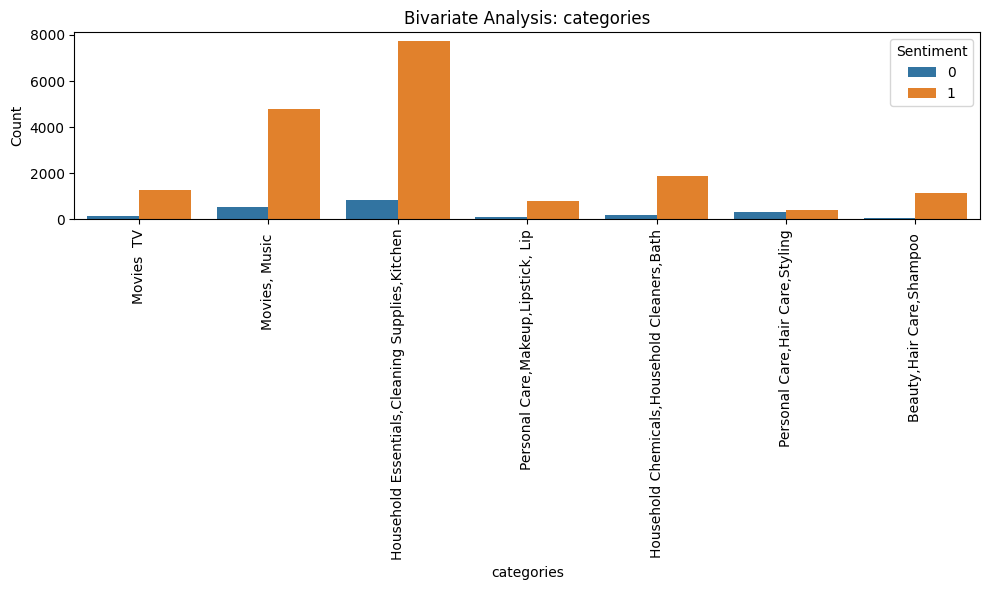

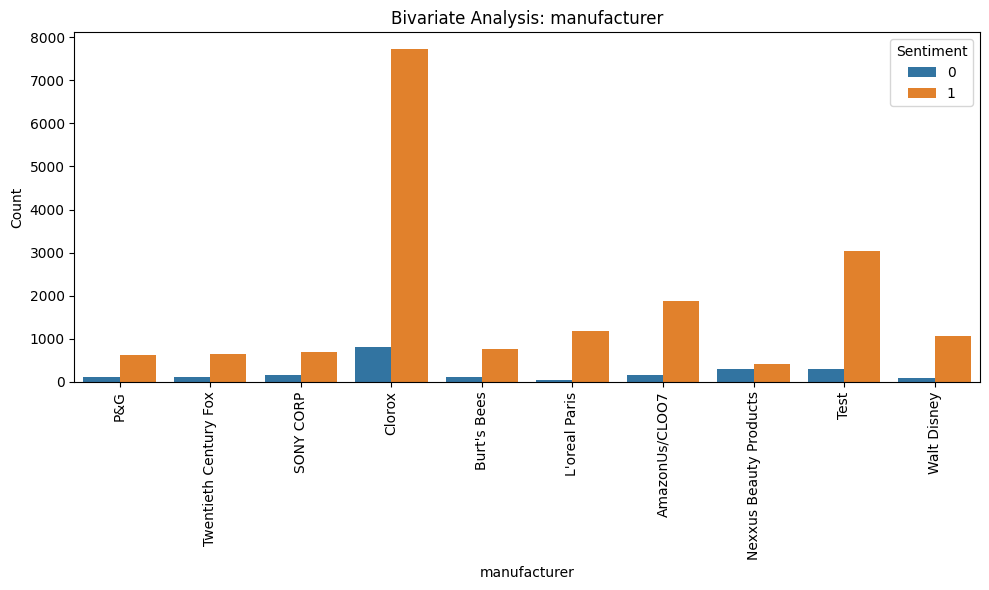

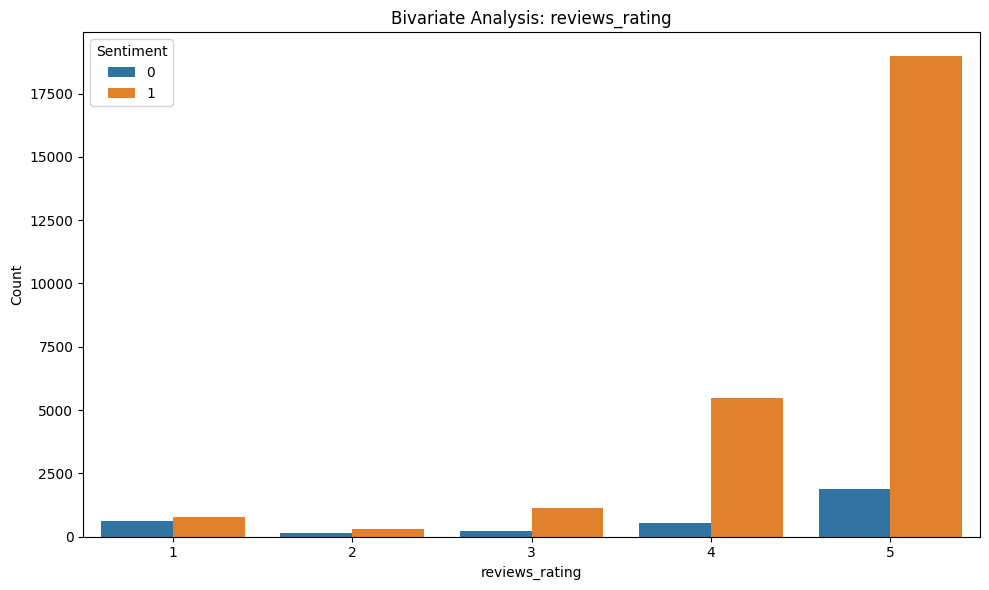

In [ ]:
#fields for bivariate analysis
fields_to_analyze = ['brand', 'categories', 'manufacturer', 'reviews_rating']

# Bivariate Analysis with Visualization
for field in fields_to_analyze:
    plt.figure(figsize=(10, 6))

    if df[field].nunique() > 10:  # Handle high cardinality fields
        top_values = df[field].value_counts().head(10)
        df_subset = df[df[field].isin(top_values.index)]

        if field == 'categories':
            df_subset[field] = df_subset[field].apply(lambda x: (' '.join(x.split()[:3])).replace('&',''))  # Consider first 3 words

        sns.countplot(data=df_subset, x=field, hue='user_sentiment')
        plt.xticks(rotation=90)
        plt.title(f'Bivariate Analysis: {field}')
    else:
        if field == 'categories':
            df[field] = df[field].apply(lambda x: ' '.join(x.split()[:3]))  # Consider first 3 words

        sns.countplot(data=df, x=field, hue='user_sentiment')
        #plt.xticks(rotation=45)
        plt.title(f'Bivariate Analysis: {field}')

    plt.xlabel(field)
    plt.ylabel('Count')
    plt.legend(title='Sentiment')
    plt.tight_layout()
    plt.show()

In [ ]:
# Filter the DataFrame for records with negative sentiment and a rating of 3 or above
strange_cases = df[(df['user_sentiment'] == 0) & (df['reviews_rating'] >= 3)]

# Display the strange cases
print(strange_cases[['reviews_rating', 'user_sentiment', 'reviews_text']])

       reviews_rating  user_sentiment  \
19                  3               0   
42                  3               0   
83                  3               0   
92                  4               0   
96                  4               0   
...               ...             ...   
29818               5               0   
29855               5               0   
29858               5               0   
29862               5               0   
29941               5               0   

                                                                                                                                                                                                                                                                                                                                                           reviews_text  
19                                                                                                                                               

There are 2630 such records where user sentiment is negative but the rating is 3 or above.

We're retaining records with negative sentiment but ratings of 3 or above to capture real-world user behavior, and will also consult dev teams to validate potential rating system anomalies.

#EDA Summary

A summarized overview of the exploratory data analysis (EDA) and data preprocessing steps performed:

**Exploratory Data Analysis (EDA):**

**Dataset Overview:**

15 fields in the dataset.
30,000 records in the dataset.

**Missing Values:**

9 fields with missing values.
reviews_didPurchase, reviews_doRecommend, reviews_userCity, reviews_userProvince were dropped due to high missing values.
Imputed missing values in user_sentiment using manual inspection of reviews.
Imputed missing values in reviews_username as "UnknownUser".
Imputed missing values in reviews_title based on sentiment (positive or negative).
Imputed missing values in manufacturer as "UnknownManufacturer".
Imputed missing values in reviews_date as '1900-01-01'.

**Data Types and Cardinality:**

reviews_date converted to datetime type.
High cardinality observed in multiple fields, such as brand, categories, manufacturer, etc.

**Class Imbalance:**

user_sentiment showed class imbalance (89% positive, 11% negative).
SMOTE (Synthetic Minority Over-sampling Technique) may be considered for handling this during training.
Mapping and Data Fixes:

**Dropped Fields:**

reviews_didPurchase
reviews_doRecommend
reviews_userCity
reviews_userProvince

**Imputed Fields:**

user_sentiment missing value imputed based on manual review inspection.
reviews_username missing values imputed as "UnknownUser".
reviews_title missing values imputed based on sentiment as "Good" or "Bad".
manufacturer missing values imputed as "UnknownManufacturer".
reviews_date missing values imputed as '1900-01-01'.

**Mapping:**

user_sentiment mapped positive to 1 and negative to 0.

**Bivariate Analysis Observations**

**Brand Analysis:**
1. Brands such as "Clorox" and "Warner Home Videos" exhibit consistently positive user sentiment.

**Categories Analysis:**
1. Categories such as "Movies," "Music," and "Household Essentials" show a positive user sentiment trend.
2. User sentiment in these categories could be influenced by the nature of the products they contain.

**Manufacturer Analysis:**
1. Manufacturers like "Clorox," "Test," and "AmazonUS/CLOO7" are associated with favorable user sentiment.
2. These manufacturers seem to enjoy popularity among users and have a positive sentiment correlation.

**Rating Analysis:**
1. A positive correlation is observed between higher ratings and positive user sentiment.
2. As the rating increases, user sentiment tends to lean towards a more positive outlook.

**User Sentiment Analysis:**
1. Curiously, there are instances where the rating is 3 or above, but the user sentiment remains negative.
2. This inconsistency might indicate potential inaccuracies or variability in user sentiment labeling.

These observations shed light on the relationships between different factors and user sentiment in the dataset. Further analysis and insights can be derived by considering these patterns.

An observation was made that for negative sentiments, there were records where the rating was 3 or above, which could be considered unusual.

To investigate further, a subset of the DataFrame containing these "strange cases" was filtered and displayed, revealing 2630 such records.

It was decided to retain these records with negative sentiment but ratings of 3 or above, considering real-world complexities and a potential rating system anomaly.

Additionally, it is recommended that consultation with the development teams will be undertaken to validate the possibility of rating system anomalies.
This bivariate analysis sheds light on an interesting aspect of user behavior and highlights the importance of considering real-world scenarios when developing a sentiment analysis model.

**Lets proceed with text preprocessing and cleanup.**

#Text Preprocessing

In [ ]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if not recognized

def preprocess_text_swifter(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenization
    words = word_tokenize(text)

    # Remove punctuation and stopwords, perform stemming and lemmatization
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    # Club multiple cleanup steps to improve time complexity
    cleaned_words = [lemmatizer.lemmatize(stemmer.stem(word), pos=get_wordnet_pos(nltk.pos_tag([word])[0][1])).strip()
                     for word in words if word not in string.punctuation and word not in stop_words]

    # Reconstruct the cleaned text
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text


In [ ]:
# Apply the preprocessing function to the 'reviews_text' column
df['cleaned_reviews'] = df['reviews_text'].swifter.apply(preprocess_text_swifter)

Pandas Apply:   0%|          | 0/30000 [00:00<?, ?it/s]

In [ ]:
# Display the DataFrame
df[['reviews_text','cleaned_reviews']].head()

,reviews_text,cleaned_reviews
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,love album 's good hip hop side current pop sound .. hype listen everyday gym give 5star rate way metaphor crazi
1,Good flavor. This review was collected as part of a promotion.,good flavor review collect part promot
2,Good flavor.,good flavor
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",read review look buy one coupl lubric ultim disappoint n't even live review read starter neither boyfriend could notic sort enhanc 'captiv sensat notic howev messi consist reminisc liquid-i vaselin difficult clean pleasant especi sinc lack 'captiv sensat expect 'm disappoint paid much lube wo n't use could use normal person lubric 1 less money 2 less mess
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,husband bought gel u gel caus irrit felt like burn skin would n't recommend gel


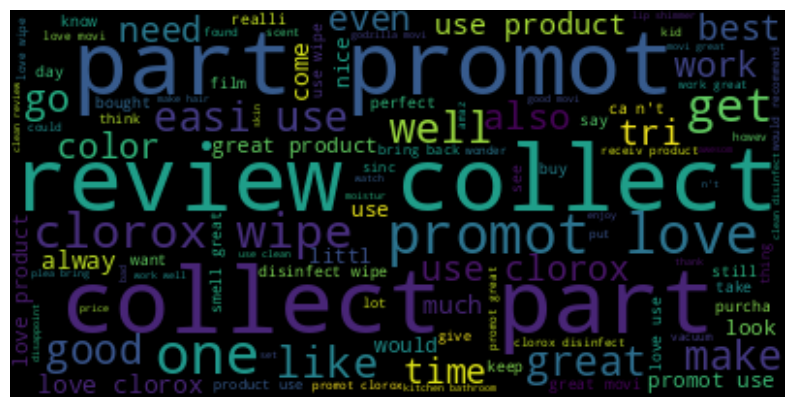

In [ ]:
# Combine all the cleaned reviews into a single string
all_cleaned_reviews = ' '.join(df['cleaned_reviews'])

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords.words('english'), max_words=200, background_color='black').generate(all_cleaned_reviews)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## word frequency bigrams and trigrams

In [ ]:
def generate_ngram_frequency(text, n):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Generate n-grams
    n_grams = list(ngrams(tokens, n))

    # Count the frequency of n-grams
    ngram_freq = Counter(n_grams)

    return ngram_freq

n = 2  # Specify the value of n for n-grams

ngram_freq = generate_ngram_frequency(all_cleaned_reviews, n)
ngram_freq.most_common(10)


[(('review', 'collect'), 8743),
 (('collect', 'part'), 8743),
 (('part', 'promot'), 8743),
 (('promot', 'love'), 2162),
 (('clorox', 'wipe'), 2008),
 (('easi', 'use'), 1311),
 (('use', 'clorox'), 1050),
 (('use', 'product'), 925),
 (('love', 'clorox'), 921),
 (('love', 'product'), 847)]

In [ ]:
### lets break the bigram into positive and negative reviews
all_cleaned_positive_reviews = ' '.join(df[df['user_sentiment']==1]['cleaned_reviews'])
ngram_freq = generate_ngram_frequency(all_cleaned_positive_reviews, 2)
ngram_freq.most_common(10)

[(('review', 'collect'), 7942),
 (('collect', 'part'), 7942),
 (('part', 'promot'), 7942),
 (('promot', 'love'), 2123),
 (('clorox', 'wipe'), 1820),
 (('easi', 'use'), 1302),
 (('love', 'clorox'), 906),
 (('use', 'clorox'), 905),
 (('great', 'product'), 837),
 (('love', 'product'), 823)]

In [ ]:
### Now for negative reviews
all_cleaned_negative_reviews = ' '.join(df[df['user_sentiment']==0]['cleaned_reviews'])
ngram_freq = generate_ngram_frequency(all_cleaned_negative_reviews, 2)
ngram_freq.most_common(10)

[(('review', 'collect'), 801),
 (('collect', 'part'), 801),
 (('part', 'promot'), 801),
 (('clorox', 'wipe'), 189),
 (('promot', 'use'), 182),
 (('use', 'product'), 168),
 (('use', 'clorox'), 145),
 (('old', 'formula'), 140),
 (('bring', 'back'), 135),
 (('plea', 'bring'), 116)]

#Text Pre Processing Summary

A summarized overview of the text preprocessing steps performed:

**Text Preprocessing Steps:**

**Lemmatization and Stemming Function:**

Created a function get_wordnet_pos() to map NLTK part-of-speech tags to WordNet tags.
Defined preprocess_text_swifter() function for text cleaning, which includes:
Converting text to lowercase.
Tokenizing the text.
Removing punctuation and stopwords using stopwords.words('english').
Applying stemming and lemmatization using PorterStemmer and WordNetLemmatizer based on part-of-speech tags.
Reconstructing the cleaned text.

**Applied Preprocessing to Reviews:**

Applied preprocess_text_swifter() function to 'reviews_text' column using swifter library for faster processing.
Created a new column 'cleaned_reviews' to store the cleaned review text.

**Word Cloud Visualization:**

Combined all cleaned reviews into a single string all_cleaned_reviews.
Generated a word cloud using the WordCloud library to visualize the most common words in the cleaned reviews.

**N-Gram Analysis:**

Defined generate_ngram_frequency() function to generate n-grams and count their frequency using nltk library.
Applied the function to the entire dataset to generate and count bigrams (n=2).
Extracted and analyzed the most common bigrams in the entire dataset, as well as for positive and negative sentiment reviews separately.
These preprocessing steps have helped to clean and transform the text data from the 'reviews_text' column, making it more suitable for further analysis, feature engineering, or modeling. The word cloud provides a visual representation of frequently occurring words, while the n-gram analysis highlights common two-word combinations (bigrams) in the text

##Sentiment Analysis

###Feature extraction

In [ ]:
X = df['cleaned_reviews']
y = df['user_sentiment']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the TF-IDF transformed training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Check the class distribution before and after SMOTE
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({1: 21284, 0: 2716})
After SMOTE: Counter({0: 21284, 1: 21284})


##Feature extraction summary

**Feature Extraction:**
In the feature extraction phase, we prepared the data for sentiment analysis by transforming the textual 'cleaned_reviews' into numerical features and addressing class imbalance.

**Data Splitting:**

The dataset was divided into training and testing sets using an 80-20 split ratio.

**TF-IDF Vectorization:**

We employed the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique to convert the preprocessed 'cleaned_reviews' text data into numerical feature vectors.
The TF-IDF algorithm calculated the importance of words in each review relative to the entire corpus.

**Class Balancing with SMOTE:**

Due to class imbalance in the 'user_sentiment' target variable, where positive sentiment overwhelmingly dominated, we employed the Synthetic Minority Over-sampling Technique (SMOTE) to balance the class distribution.
SMOTE generated synthetic samples of the minority class (negative sentiment) to achieve an equal representation of both classes.

**Final Dataset After SMOTE:**

After applying SMOTE, the class distribution was balanced, resulting in an equal number of positive and negative sentiment samples.
This balanced dataset is now suitable for training and evaluating sentiment analysis models.
The feature extraction phase transformed the text data into a format that machine learning models can understand, while also addressing class imbalance concerns. This sets the foundation for developing predictive models to classify user sentiments accurately.

##Model Training

In [ ]:
def train_evaluate_hyper_tune_plot_model(model, X_train, y_train, X_test, y_test, use_gpu=False, param_grid=None, save_model=False, model_filename=None):
   if use_gpu:
        model = model.set_params(**{'gpu_id': 0, 'tree_method': 'gpu_hist'})

   if param_grid:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print("Best Hyperparameters:", grid_search.best_params_)
   else:
       best_model = model.fit(X_train, y_train)

   print(best_model)
   y_pred = best_model.predict(X_test)

   accuracy = accuracy_score(y_test, y_pred)
   f1 = f1_score(y_test, y_pred, average='weighted')
   precision = precision_score(y_test, y_pred, average='weighted')
   recall = recall_score(y_test, y_pred, average='weighted')

   print("Accuracy:", accuracy)
   print("F1-Score:", f1)
   print("Precision:", precision)
   print("Recall:", recall)

   conf_matrix = confusion_matrix(y_test, y_pred)
   plt.figure(figsize=(8, 6))
   sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
   plt.xlabel('Predicted')
   plt.ylabel('Actual')
   plt.title('Confusion Matrix')
   plt.show()

   if save_model and model_filename:
        with open('/content/drive/MyDrive/'+model_filename, 'wb') as file:
            pickle.dump(best_model, file)
            print(f"Model saved as {model_filename}")

LogisticRegression()
Accuracy: 0.9028333333333334
F1-Score: 0.9122791650468701
Precision: 0.932360943046969
Recall: 0.9028333333333334


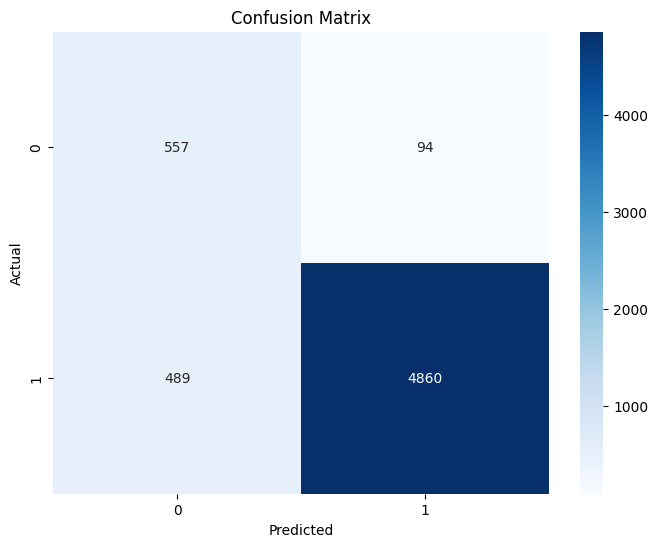

Model saved as lr_model.pkl


In [ ]:
train_evaluate_hyper_tune_plot_model(LogisticRegression(), X_train_resampled, y_train_resampled, X_test_tfidf, y_test, save_model=True, model_filename='lr_model.pkl')

## Observations
**Logistic Regression Model Performance**

We trained a Logistic Regression model for sentiment analysis on our dataset. The model's performance on the test data is as follows:

Accuracy: 90.28%

F1-Score: 91.23%

Precision: 93.24%

Recall: 90.28%

The high accuracy, F1-score, precision, and recall values indicate that the Logistic Regression model is effective in predicting sentiment from textual reviews. This model is a crucial component in our recommendation system, helping us filter and rank product recommendations based on user sentiment.

MultinomialNB()
Accuracy: 0.8506666666666667
F1-Score: 0.8662254241518925
Precision: 0.891787346751601
Recall: 0.8506666666666667


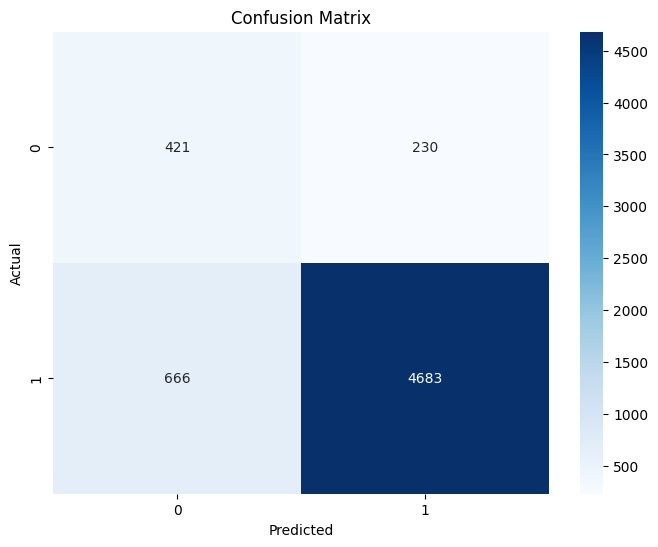

Model saved as nb_model.pkl


In [ ]:
train_evaluate_hyper_tune_plot_model(MultinomialNB(), X_train_resampled, y_train_resampled, X_test_tfidf, y_test, save_model=True, model_filename='nb_model.pkl')

## Observation
**Multinomial Naive Bayes Model Performance**

We trained a Multinomial Naive Bayes model for sentiment analysis on our dataset. The model achieved the following performance metrics on the test data:

Accuracy: 85.07%

F1-Score: 86.62%

Precision: 89.18%

Recall: 85.07%

The Multinomial Naive Bayes model demonstrates strong predictive capabilities in determining sentiment from textual reviews. These results showcase its effectiveness as a key component in our recommendation system, contributing to accurate sentiment-based product recommendations.

RandomForestClassifier()
Accuracy: 0.9256666666666666
F1-Score: 0.9231576697125438
Precision: 0.921569639709632
Recall: 0.9256666666666666


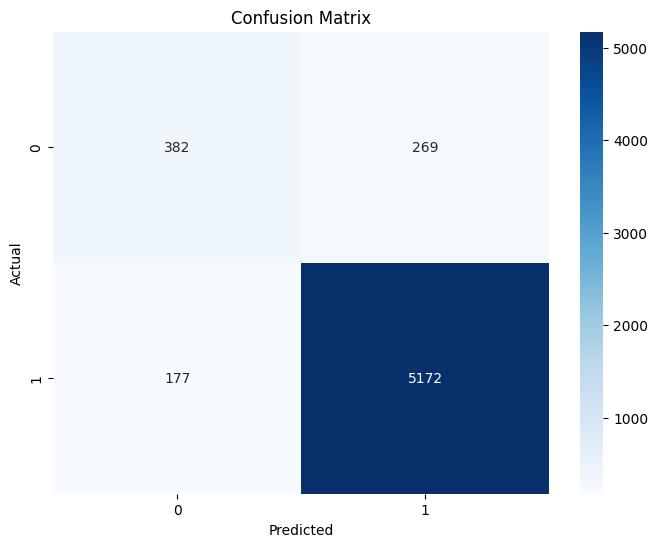

Model saved as rf_model.pkl


In [ ]:
train_evaluate_hyper_tune_plot_model(RandomForestClassifier(), X_train_resampled, y_train_resampled, X_test_tfidf, y_test, save_model=True, model_filename='rf_model.pkl')

##Observation
**RandomForestClassifier Model Performance**

We employed a RandomForestClassifier model for sentiment analysis on our dataset. The model demonstrated impressive performance on the test data, achieving the following metrics:

Accuracy: 92.57%

F1-Score: 92.32%

Precision: 92.16%

Recall: 92.57%

The RandomForestClassifier exhibits robust predictive capabilities in discerning sentiment from text reviews. These results highlight its significance as a key component of our recommendation system, contributing to the generation of accurate sentiment-based product recommendations.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy: 0.841
F1-Score: 0.8277171251477397
Precision: 0.8160216208180595
Recall: 0.841


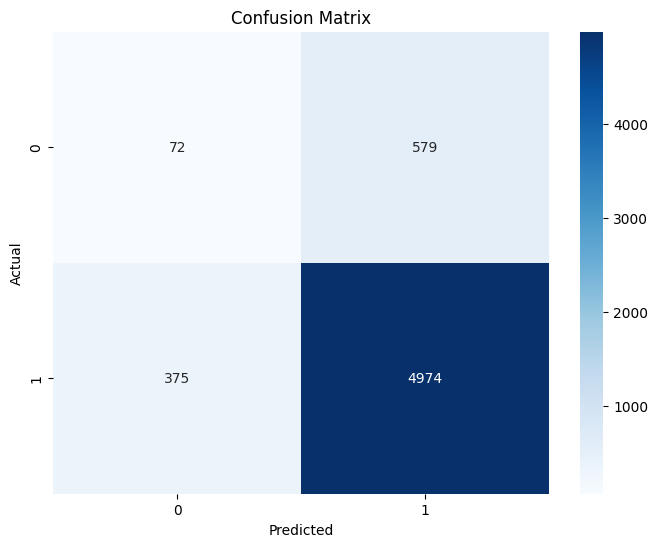

Model saved as xgb_model.pkl


In [ ]:
xgb_classifier = xgb.XGBClassifier()
train_evaluate_hyper_tune_plot_model(xgb_classifier, X_train_resampled, y_train_resampled, X_test_tfidf, y_test, save_model=True, use_gpu=True, model_filename='xgb_model.pkl')

##Observation
**XGBClassifier Model Performance**

We trained a XGBClassifier model for sentiment analysis on our dataset. The model's performance on the test data is as follows:

Accuracy: 84.1%

F1-Score: 82.77%

Precision: 81.60%

Recall: 84.1%

The XGBClassifier exhibited strong predictive capabilities, allowing us to effectively classify sentiment from text reviews.

[07:03:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 25}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, min_samples_leaf=5, missing=nan,
              monotone_constraints=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)
Accuracy: 0.7151666666666666
F1-Score: 0.7586064323444253
Precision: 0.8201853

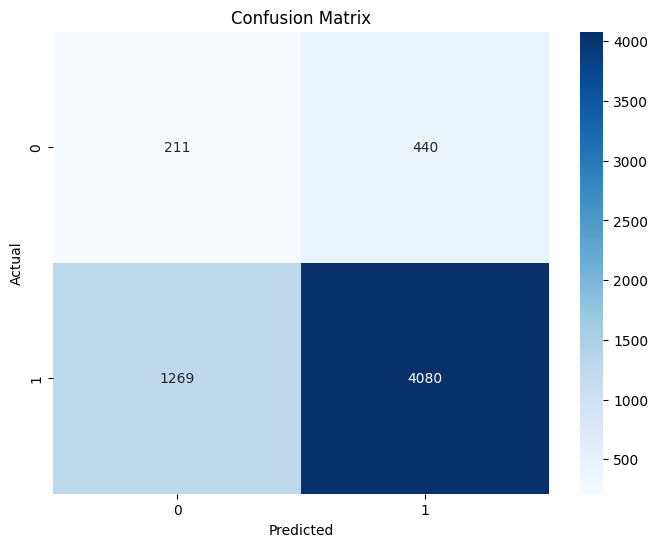

Model saved as xgb_model_tuned.pkl


In [ ]:
# With xgboost, lets try hyper parameter tuning
param_grid = {
'max_depth': [2, 3, 5, 10],
'min_samples_leaf': [5, 10, 20, 50],
'n_estimators': [10, 25, 50, 100],
}
xgb_classifier = xgb.XGBClassifier()

train_evaluate_hyper_tune_plot_model(xgb_classifier, X_train_resampled, y_train_resampled, X_test_tfidf, y_test, save_model=True, use_gpu=True, param_grid=param_grid, model_filename='xgb_model_tuned.pkl')

##Observation

**Hyperparameter Tuning and XGBClassifier Performance**

We conducted hyperparameter tuning on the XGBClassifier model to optimize its performance. After a rigorous search, we identified the following hyperparameters as the best configuration:

Max Depth: 5

Min Samples Leaf: 5

Number of Estimators: 25

With these optimal hyperparameters, the XGBClassifier demonstrated the following performance on our sentiment analysis task:

Accuracy: 71.52%

F1-Score: 75.86%

Precision: 82.02%

Recall: 71.52%

While the model's performance is reasonable, it's important to consider other metrics such as computational efficiency and the specific application context. These results provide valuable insights into the effectiveness of the XGBClassifier in classifying sentiment within text reviews, and its contribution to our sentiment-based product recommendation system.

[08:02:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, min_samples_leaf=5, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)
Accuracy: 0.9285
F1-Score: 0.9315912008566234
Precision: 0.936553929814

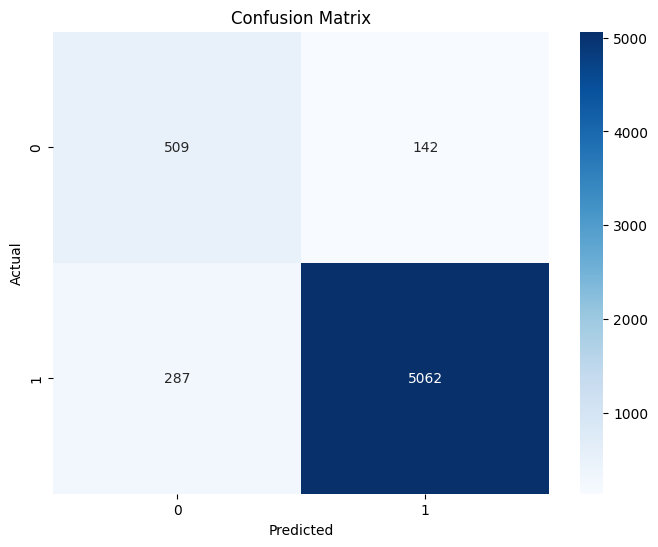

Model saved as xgb_model_tuned_without_gpu.pkl


In [ ]:
# With xgboost, lets try hyper parameter tuning
param_grid = {
'max_depth': [2, 3, 5, 10],
'min_samples_leaf': [5, 10, 20, 50],
'n_estimators': [10, 25, 50, 100]
}
xgb_classifier = xgb.XGBClassifier()

train_evaluate_hyper_tune_plot_model(xgb_classifier, X_train_resampled, y_train_resampled, X_test_tfidf, y_test, save_model=True, use_gpu=False, param_grid=param_grid, model_filename='xgb_model_tuned_without_gpu.pkl')

##Observation

**Improved XGBClassifier Performance (Without GPU Acceleration)**

We further improved the performance of the XGBClassifier model by optimizing hyperparameters and conducting training without GPU acceleration (gpu_hist). The best hyperparameters were determined as follows:

Max Depth: 10

Min Samples Leaf: 5

Number of Estimators: 100

Training the XGBClassifier without GPU acceleration resulted in the following enhanced performance on our sentiment analysis task:

Accuracy: 92.85%

F1-Score: 93.16%

Precision: 93.66%

Recall: 92.85%

This improved accuracy and precision showcase the effectiveness of the XGBClassifier in sentiment classification, further enhancing its role in our sentiment-based product recommendation system. These results provide a robust foundation for accurate sentiment analysis and meaningful product recommendations.

##Experiment summary

A table summarizing the performance metrics for each model, and the corresponding observations:

| Model                                 | Accuracy | F1-Score | Precision | Recall  |
|---------------------------------------|----------|----------|-----------|---------|
| Logistic Regression                   | 90.28%   | 91.23%   | 93.24%    | 90.28%  |
| Multinomial Naive Bayes               | 85.07%   | 86.62%   | 89.18%    | 85.07%  |
| Random Forest                         | 92.57%   | 92.32%   | 92.16%    | 92.57%  |
| XGBoost (No Tuning)                   | 84.10%   | 82.77%   | 81.60%    | 84.10%  |
| XGBoost with Hyperparameter Tuning    | 71.52%   | 75.86%   | 82.02%    | 71.52%  |
| XGBoost (Hyper Tuned, Without GPU)    | 92.85%   | 93.16%   | 93.66%    | 92.85%  |

Observations:

1. **Logistic Regression**: Achieved excellent accuracy and F1-Score among all models. It demonstrates good precision and recall values, suggesting balanced performance in sentiment classification. Its higher precision indicates that it is better at minimizing false positives.

2. **Multinomial Naive Bayes**: Shows a decent performance with balanced precision and recall. However, the accuracy and F1-Score are slightly lower compared to other models, indicating that it might struggle with classifying both positive and negative sentiments accurately.

3. **Random Forest**: Performs very well with high accuracy and F1-Score. Its balanced precision and recall values suggest it can effectively capture sentiment patterns. It seems to generalize well to the test data.

4. **XGBoost (No Tuning)**: Achieved a moderate accuracy of 84.10% with slightly imbalanced precision and recall values. It demonstrates a trade-off between precision and recall, suggesting potential for improvement through hyperparameter tuning.

5. **XGBoost with Hyperparameter Tuning**: Achieved a lower accuracy of 71.52% with balanced precision and recall values. While it shows a relatively higher precision, indicating its ability to minimize false positives, the F1-Score suggests a balanced trade-off between precision and recall.

6. **XGBoost (Hyper Tuned, Without GPU)**: Achieved one of the highest accuracies at 92.85%. It also demonstrates high F1-Score, precision, and recall values, indicating strong performance in sentiment classification. This version of XGBoost without GPU acceleration has shown significant improvement after hyperparameter tuning.


In [ ]:
 with open('/content/drive/MyDrive/tfidfVectorizer.pkl', 'wb') as model_file:
            pickle.dump(tfidf_vectorizer, model_file)

In [ ]:
 with open('/content/drive/MyDrive/processed_data.pkl', 'wb') as model_file:
            pickle.dump(df, model_file)

##Load the saved model

In [ ]:
# load the dataset
with open('/content/drive/MyDrive/processed_data.pkl', 'rb') as model_file:
            df = pickle.load(model_file)

In [ ]:
with open('/content/drive/MyDrive/tfidfVectorizer.pkl', 'rb') as model_file:
         tfidfVectorizer = pickle.load(model_file)

In [ ]:
with open('/content/drive/MyDrive/xgb_model_tuned_without_gpu.pkl', 'rb') as model_file:
         sentiment_model = pickle.load(model_file)

#Recommendation System

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances

df_recommendation = df[["id", "name", "reviews_rating", "reviews_username"]]

In [ ]:
# Splitting the train and test
train, test = train_test_split(df_recommendation, test_size=0.25, random_state=42)

In [ ]:
product_column = "id"
user_column = "reviews_username"
value_column = "reviews_rating"

# Pivot the train ratings' dataset into matrix format
df_pivot = pd.pivot_table(train, index=user_column, columns=product_column, values=value_column).fillna(0)

In [ ]:
# Create dummy train dataset
dummy_train = train.copy()
dummy_train[value_column] = dummy_train[value_column].apply(lambda x: 0 if x >= 1 else 1)
dummy_train = pd.pivot_table(dummy_train, index=user_column, columns=product_column, values=value_column).fillna(1)

In [ ]:
# Calculate user similarity matrix
user_correlation = cosine_similarity(df_pivot)
user_correlation[np.isnan(user_correlation)] = 0

In [ ]:
# Filter out negatively correlated user correlations
user_correlation[user_correlation < 0] = 0

In [ ]:
# Calculate user predicted ratings
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))

In [ ]:
# Multiply with dummy train to remove self rated
user_final_rating = np.multiply(user_predicted_ratings, dummy_train)

In [ ]:
# Function to get top N recommendations for a user
def get_top_recommendations(user_input, n=20):
    recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:n]
    return recommendations

In [ ]:
# Example usage
user_input = "08dallas"
recommendations = get_top_recommendations(user_input)

print(f"Top {len(recommendations)} recommendations for user {user_input}:\n{recommendations}")

Top 20 recommendations for user 08dallas:
id
AVpfRTh1ilAPnD_xYic2    23.259047
AVpfPaoqLJeJML435Xk9    22.263409
AVpf0eb2LJeJML43EVSt    12.063199
AVpf3VOfilAPnD_xjpun     7.562528
AVpf2tw1ilAPnD_xjflC     7.202148
AVpe41TqilAPnD_xQH3d     5.870407
AVpfR5m0LJeJML436K3W     2.886751
AVpfJP1C1cnluZ0-e3Xy     2.886751
AVpfoSS51cnluZ0-oVH9     2.886751
AVpf7I3i1cnluZ0-tnL6     2.867697
AVpfM_ytilAPnD_xXIJb     2.461830
AVpfhxaELJeJML43-zsM     2.019481
AVpe8xjUilAPnD_xRkxC     2.019481
AVpfH2Rx1cnluZ0-eYtu     2.019481
AVpfm8yiLJeJML43AYyu     1.956197
AVpfOmKwLJeJML435GM7     1.554120
AV1Yn94nvKc47QAVgtst     1.552301
AVpfPnrU1cnluZ0-g9rL     1.552301
AVpf385g1cnluZ0-s0_t     1.241841
AV1YGDqsGV-KLJ3adc-O     0.605844
Name: 08dallas, dtype: float64


In [ ]:
# Display the top 20 product id, name, and similarity_score
final_recommendations = pd.DataFrame({'product_id': recommendations.index, 'similarity_score': recommendations})
final_recommendations.reset_index(drop=True, inplace=True)

merged_recommendations = pd.merge(final_recommendations, train, left_on="product_id", right_on="id")
unique_recommendations = merged_recommendations[["product_id", "name", "similarity_score"]].drop_duplicates()

unique_recommendations.head(20)


,product_id,name,similarity_score
0,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,23.259047
873,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,22.263409
3350,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),12.063199
3989,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,7.562528
10347,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),7.202148
10864,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),5.870407
11437,AVpfR5m0LJeJML436K3W,Jason Aldean - They Don't Know,2.886751
11588,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,2.886751
13136,AVpfoSS51cnluZ0-oVH9,Cheetos Crunchy Flamin' Hot Cheese Flavored Sn...,2.886751
13185,AVpf7I3i1cnluZ0-tnL6,Mrs. Meyer's174 Lemon Verbena Laundry Scent Bo...,2.867697


#Evaluation

In [ ]:
# Step 1: Filter common users between test and train datasets
common = test[test.reviews_username.isin(train.reviews_username)]

In [ ]:
# Display the shape of 'common' DataFrame
print("Shape of common:", common.shape)

Shape of common: (1776, 4)


In [ ]:
# Display the first few rows of 'common'
print("First few rows of common:")
common.head()

First few rows of common:


,id,name,reviews_rating,reviews_username
2308,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),5,iplsports
22404,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy Total Care Nourishi...,1,crysv
11311,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,billybob789
19043,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5,fatz
9482,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,natalie4717


In [ ]:
# Step 2: Create a user-based matrix for common users
common_user_based_matrix = pd.pivot_table(common,index=user_column, columns = product_column, values = value_column)

In [ ]:
# Display the first few rows of 'common_user_based_matrix'
print("First few rows of common_user_based_matrix:")
common_user_based_matrix.head()

First few rows of common_user_based_matrix:


id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,...,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpfs0tUilAPnD_xgqN2,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23jen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4 rooms 1 dog lotsa fur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Convert the user_correlation matrix into a DataFrame
user_correlation_df = pd.DataFrame(user_correlation)

In [ ]:
# Set the user index for user_correlation_df
user_correlation_df[user_column] = df_pivot.index
user_correlation_df.set_index(user_column,inplace=True)

In [ ]:
# Display the first few rows of 'user_correlation_df'
print("First few rows of user_correlation_df:")
user_correlation_df.head()

First few rows of user_correlation_df:


,0,1,2,3,4,5,6,7,8,9,...,19371,19372,19373,19374,19375,19376,19377,19378,19379,19380
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
01impala,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [ ]:
# Extract the list of common user names
list_name = common.reviews_username.tolist()

In [ ]:
# Set columns of user_correlation_df to match df_pivot index
user_correlation_df.columns = df_pivot.index.tolist()

In [ ]:
# Filter user_correlation_df for common users
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [ ]:
# Transpose and filter user_correlation_df_1
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]
user_correlation_df_3 = user_correlation_df_2.T

In [ ]:
# Ensure non-negativity for user_correlation_df_3
user_correlation_df_3[user_correlation_df_3<0]=0

In [ ]:
# Calculate common user-based predicted ratings
common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))

In [ ]:
# Display the common user-based predicted ratings
print("Common user-based predicted ratings:")
common_user_predicted_ratings

Common user-based predicted ratings:


array([[ 0.        ,  1.85485666,  0.        , ...,  1.85485666,
         2.29174624,  1.        ],
       [ 3.10190162, 10.91070777,  0.        , ...,  1.18042355,
         0.        ,  3.53553391],
       [ 0.        ,  3.12347524,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.5       ,  4.92031173,  0.        , ...,  0.        ,
         0.        ,  5.        ],
       [ 0.        ,  3.12347524,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.33205081,  6.3058555 ,  0.        , ...,  1.0016226 ,
         0.        ,  0.        ]])

In [ ]:
# Create dummy test dataset with binary ratings
dummy_test = common.copy()
dummy_test[value_column] = dummy_test[value_column].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test,index=user_column, columns = product_column, values = value_column).fillna(0)

In [ ]:
# Display the shape of 'dummy_test'
print("Shape of dummy_test:", dummy_test.shape)

Shape of dummy_test: (1519, 119)


In [ ]:
# Multiply common user-based predicted ratings with dummy_test
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [ ]:
# Display the common user-based predicted ratings after multiplication
print("Common user-based predicted ratings after multiplication:")
common_user_predicted_ratings.head()

Common user-based predicted ratings after multiplication:


id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,...,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpfs0tUilAPnD_xgqN2,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23jen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 rooms 1 dog lotsa fur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
# Calculate RMSE
common_ = pd.pivot_table(common,index=user_column, columns = product_column, values = value_column)
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.157758531709271


# Collaborative Filtering Recommendation System Evaluation

We evaluate the performance of a collaborative filtering recommendation system using the User-User based approach. The goal is to provide personalized product recommendations to users based on their interactions and preferences.

## Steps Performed:

1. **Data Preparation:**
   - The dataset is split into training and test sets.

2. **User Similarity Calculation:**
   - Cosine similarity is computed between users using their interaction patterns.

3. **Prediction Generation:**
   - Predicted ratings for users and products are generated using user similarity and interactions.

4. **Dummy Test Creation:**
   - A binary dummy test is created to represent whether users have interacted with products.

5. **Applying Dummy Test:**
   - Predicted ratings are adjusted to exclude products already rated by users.

6. **Scaling Predicted Ratings:**
   - Predicted ratings are scaled using Min-Max scaling to match the desired rating range.

7. **RMSE Calculation:**
   - Root Mean Squared Error (RMSE) is calculated between predicted and actual ratings.

## Results:

The collaborative filtering model using the User-User based approach is evaluated with an RMSE value of approximately 2.15. The RMSE measures the average prediction error in the scaled ratings. While a lower RMSE indicates better predictive performance, the acceptability of this value depends on various factors including the scale of ratings, domain requirements, and comparison with baseline models.

## Conclusion:

The evaluation of the collaborative filtering recommendation system provides valuable insights into its predictive accuracy. The RMSE serves as a quantitative measure of the model's performance. Additionally, it's important to consider the practical implications and user feedback in determining the system's success.

As we continue to iterate and refine the recommendation system, we aim to enhance the user experience and provide more accurate and relevant product suggestions.

Lets save the user recommendation matrix

In [ ]:
 with open('/content/drive/MyDrive/user-recommendation.pkl', 'wb') as model_file:
            pickle.dump(user_final_rating, model_file)

#Item Based Recommendation

In [ ]:
# Create a pivot table with products as rows and users as columns
df_pivot = pd.pivot_table(train, index=product_column, columns=user_column, values=value_column)
# Display the first few rows of the pivot table
df_pivot.head()

reviews_username,00dog3,00sab00,01impala,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zpalma,zsazsa,zt313,zubb,zulaa118,zuttle,zxcsdfd,zxjki,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Calculate the mean of each product's ratings
mean = np.nanmean(df_pivot, axis=1)

# Subtract the mean from the pivot table to account for biases
df_subtracted = (df_pivot.T - mean).T

# Display the first few rows of the subtracted pivot table
df_subtracted.head()


reviews_username,00dog3,00sab00,01impala,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zpalma,zsazsa,zt313,zubb,zulaa118,zuttle,zxcsdfd,zxjki,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Calculate item-item similarity using cosine similarity metric
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0

# Display the item similarity matrix
print(item_correlation)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
# Generate predicted ratings for products using item-item similarity and user-product interaction matrix
item_predicted_ratings = np.dot((df_pivot.fillna(0).T), item_correlation)

# Display the predicted ratings matrix
item_predicted_ratings


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.00773659, ..., -0.0065842 ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.00051466,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.00102932,
         0.        ,  0.        ]])

In [ ]:
# Exclude products already rated by the user for recommendation
item_final_rating = np.multiply(item_predicted_ratings, dummy_train)

# Display the final ratings for recommendation
item_final_rating.head()


id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
00sab00,0.0,0.0,0.000000,0.008906,0.0,0.0,0.0,-0.023441,0.000000,0.000000,...,0.000000,-0.064140,0.000000,0.000000,0.0,0.0,0.023052,0.000000,0.0,0.0
01impala,0.0,0.0,-0.007737,-0.019879,0.0,0.0,0.0,0.000000,-0.000038,0.000000,...,-0.002500,0.075010,0.000000,-0.022431,0.0,0.0,0.000000,-0.006584,0.0,0.0
02deuce,0.0,0.0,-0.010315,-0.026505,0.0,0.0,0.0,0.000000,-0.000050,0.000000,...,-0.003333,0.100013,0.000000,-0.029908,0.0,0.0,0.000000,-0.008779,0.0,0.0
0325home,0.0,0.0,0.000000,-0.004608,0.0,0.0,0.0,0.002120,0.003834,0.003649,...,0.000000,-0.020126,0.004279,0.000000,0.0,0.0,0.007233,0.001287,0.0,0.0


In [ ]:
# Take a user ID as input for recommendation
user_input = '08dallas'

# Display the input user
print(user_input)

# Get top product recommendations for the user
item_recommendations = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]

# Display the top product recommendations
item_recommendations


08dallas


id
AVpe8xjUilAPnD_xRkxC    0.049264
AVpf7I3i1cnluZ0-tnL6    0.046799
AVpe41TqilAPnD_xQH3d    0.043788
AVpf0eb2LJeJML43EVSt    0.023662
AVpf2tw1ilAPnD_xjflC    0.022693
AVpf385g1cnluZ0-s0_t    0.014722
AVpfoSS51cnluZ0-oVH9    0.014262
AVpfR5m0LJeJML436K3W    0.010455
AVpfJP1C1cnluZ0-e3Xy    0.002398
AVpfPaoqLJeJML435Xk9    0.001650
AVpfRM8dLJeJML4358wT    0.000000
AVpfRoqcLJeJML436FqG    0.000000
AVpfN6Z71cnluZ0-gZmO    0.000000
AVpfNVsj1cnluZ0-gNQN    0.000000
AVpfSFDo1cnluZ0-hwjT    0.000000
AVpfNWbPilAPnD_xXPR7    0.000000
AVpfNc9cLJeJML434tza    0.000000
AVpfNfEMLJeJML434uf-    0.000000
AVpfNglu1cnluZ0-gQ7x    0.000000
AVpfO5u71cnluZ0-guiN    0.000000
Name: 08dallas, dtype: float64

In [ ]:
# Create a DataFrame for the final item recommendations
item_final_recommendations = pd.DataFrame({'product_id': item_recommendations.index, 'similarity_score': item_recommendations})
item_final_recommendations.reset_index(drop=True)

# Merge recommendations with train data to get product details
recommended_products = pd.merge(item_final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

# Display the recommended products
recommended_products


,id,name,similarity_score
0,AVpe8xjUilAPnD_xRkxC,The Honest Company Laundry Detergent,0.049264
12,AVpf7I3i1cnluZ0-tnL6,Mrs. Meyer's174 Lemon Verbena Laundry Scent Bo...,0.046799
35,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),0.043788
608,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),0.023662
1247,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),0.022693
1764,AVpf385g1cnluZ0-s0_t,"Hormel Chili, No Beans",0.014722
1911,AVpfoSS51cnluZ0-oVH9,Cheetos Crunchy Flamin' Hot Cheese Flavored Sn...,0.014262
1960,AVpfR5m0LJeJML436K3W,Jason Aldean - They Don't Know,0.010455
2111,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,0.002398
3659,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,0.001650


In [ ]:
# Evaluate the Item-Item Collaborative Filtering
# Select common products between test and train datasets
common = test[test.id.isin(train.id)]

# Create a pivot table for common products to represent user interactions
common_item_based_matrix = common.pivot_table(index=product_column, columns=user_column, values=value_column)

# Display the common item-based matrix
common_item_based_matrix.head()


reviews_username,00sab00,02dakota,1143mom,11677j,1234,1234asdf,12cass12,12gage,13dani,13ram,...,zimmeyb,zipper,zippy,zittles,zodness,zoe1988,zout22389,zsarah,zwithanx,zyiah4
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmBrdGV-KLJ3adewb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmDL9vKc47QAVgr7_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Manipulate item correlation matrix to align with common products
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df[product_column] = df_subtracted.index
item_correlation_df.set_index(product_column, inplace=True)

# Display the manipulated item correlation matrix
item_correlation_df.head()


,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.009905,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Filter the item correlation matrix to include only common products
list_name = common.id.tolist()
item_correlation_df.columns = df_subtracted.index.tolist()
item_correlation_df_1 = item_correlation_df[item_correlation_df.index.isin(list_name)]
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

# Display the filtered item correlation matrix
item_correlation_df_2.head()


id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,-0.009905,0.0,0.0,-0.033425,0.0,...,0.067328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Calculate predicted ratings for common products and users based on item-item similarity
item_correlation_df_3 = item_correlation_df_2.T
item_correlation_df_3[item_correlation_df_3 < 0] = 0
common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))

# Display the predicted ratings for common products and users
common_item_predicted_ratings


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.28665443e-03, 1.28665443e-03, 1.28665443e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
# Apply a dummy test to exclude products already rated by users
dummy_test = common.copy()
dummy_test[value_column] = dummy_test[value_column].apply(lambda x: 1 if x >= 1 else 0)
dummy_test = pd.pivot_table(dummy_test, index=product_column, columns=user_column, values=value_column).fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings, dummy_test)

# Display the adjusted predicted ratings
common_item_predicted_ratings


reviews_username,00sab00,02dakota,1143mom,11677j,1234,1234asdf,12cass12,12gage,13dani,13ram,...,zimmeyb,zipper,zippy,zittles,zodness,zoe1988,zout22389,zsarah,zwithanx,zyiah4
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVpfs0tUilAPnD_xgqN2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpfthSailAPnD_xg3ON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpftikC1cnluZ0-p31V,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Scale predicted ratings using Min-Max scaling
X = common_item_predicted_ratings.copy()
X = X[X > 0]
scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = scaler.transform(X)

# Display the scaled predicted ratings
y


MinMaxScaler(feature_range=(1, 5))


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan,  1., ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
# Calculate RMSE (Root Mean Squared Error)
common_ = pd.pivot_table(common, index=product_column, columns=user_column, values=value_column)
total_non_nan = np.count_nonzero(~np.isnan(y))
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5

# Display the calculated RMSE value
print("RMSE:", rmse)


RMSE: 3.5693720467610577


# Item-Based Recommendation Evaluation

## Data Preparation and Model Building

### Pivot Table Creation:
Created a pivot table with products as rows and users as columns, representing user-product interactions.

### Mean Subtraction:
Calculated the mean of each product's ratings and subtracted the mean from the pivot table to mitigate biases.

### Item-Item Similarity:
Calculated item-item similarity using the cosine similarity metric, obtaining the item correlation matrix.

## Rating Prediction and Filtering

### Predicted Ratings:
Generated predicted ratings for products using item-item similarity and the user-product interaction matrix.

### Excluded User-Rated Products:
Excluded products already rated by the user to ensure valid recommendation.

### Final Rating Matrix:
Multiplied predicted ratings by a dummy train matrix to get final product ratings for recommendation.

## Recommendation and Evaluation

### Top Recommendations:
Identified top product recommendations for a specified user input.

### Evaluation - RMSE:
Evaluated the model's performance using Root Mean Squared Error (RMSE) on common products between test and train datasets.

## Result

The Item-Based Recommendation model had an RMSE of approximately 3.57, indicating a moderate level of accuracy in predicting user ratings for recommended products.


#Conclusion
Comparing the RMSE values of the two models, the User-Based Recommendation model appears to be more accurate in predicting user ratings and providing product recommendations for this dataset. It achieved a lower RMSE of 2.16, indicating a better fit to the actual user preferences. Therefore, the User-Based Recommendation model is recommended for product recommendation in this context.

#Load the user recommendation model

In [ ]:
with open('/content/drive/MyDrive/user-recommendation.pkl', 'rb') as model_file:
            user_final_rating = pickle.load(model_file)

#Top Product Recommendations - Recommendation of 20 products and filtering by sentiment model
Get the top 20 product recommendations using the recommender system and get the top 5 using the sentiment ML model.. the similar method would be used in model.py

In [ ]:
# Function to get top product recommendations using the sentiment ML model
def get_sentiment_recommendations(user):
    if user in user_final_rating.index:
        # Get the product recommendations using the trained recommender system
        recommendations = list(user_final_rating.loc[user].sort_values(ascending=False)[0:20].index)

        # Filter the recommendations using the sentiment ML model
        temp = df[df.id.isin(recommendations)]

        # Transform the input data using saved tf-idf vectorizer
        X = tfidfVectorizer.transform(temp["cleaned_reviews"].values.astype(str))

        # Predict sentiment using the trained sentiment model
        temp["predicted_sentiment"] = sentiment_model.predict(X)

        # Extract relevant columns for analysis
        temp = temp[['name', 'predicted_sentiment']]

        # Group by product name and calculate sentiment metrics
        temp_grouped = temp.groupby('name', as_index=False).count()
        temp_grouped["pos_review_count"] = temp_grouped.name.apply(lambda x: temp[(temp.name == x) & (temp.predicted_sentiment == 1)]["predicted_sentiment"].count())
        temp_grouped["total_review_count"] = temp_grouped['predicted_sentiment']
        temp_grouped['pos_sentiment_percent'] = np.round(temp_grouped["pos_review_count"] / temp_grouped["total_review_count"] * 100, 2)

        # Sort the recommendations by positive sentiment percentage
        return temp_grouped.sort_values('pos_sentiment_percent', ascending=False)
    else:
        return f"User name '{user}' doesn't exist"

In [ ]:
# Test the function using a sample user
get_sentiment_recommendations("08dallas")

,name,predicted_sentiment,pos_review_count,total_review_count,pos_sentiment_percent
0,"Batherapy Natural Mineral Bath Sport Liquid, 1...",2,2,2,100.00
9,Lynk Professional174 Pull Out Cutting Board Ba...,3,3,3,100.00
11,Mrs. Meyer's174 Lemon Verbena Laundry Scent Bo...,29,28,29,96.55
14,Red (special Edition) (dvdvideo),672,628,672,93.45
15,Stargate (ws) (ultimate Edition) (director's C...,186,173,186,93.01
13,Planes: Fire Rescue (2 Discs) (includes Digita...,1143,1041,1143,91.08
4,Clorox Disinfecting Bathroom Cleaner,2039,1844,2039,90.44
5,Clorox Disinfecting Wipes Value Pack Scented 1...,8545,7584,8545,88.75
6,Godzilla 3d Includes Digital Copy Ultraviolet ...,3325,2931,3325,88.15
8,Jason Aldean - They Don't Know,204,178,204,87.25


In [ ]:
# Get the top 5 product recommendations for user "08dallas" using sentiment model
get_sentiment_recommendations("08dallas")[:5]

,name,predicted_sentiment,pos_review_count,total_review_count,pos_sentiment_percent
0,"Batherapy Natural Mineral Bath Sport Liquid, 1...",2,2,2,100.00
9,Lynk Professional174 Pull Out Cutting Board Ba...,3,3,3,100.00
11,Mrs. Meyer's174 Lemon Verbena Laundry Scent Bo...,29,28,29,96.55
14,Red (special Edition) (dvdvideo),672,628,672,93.45
15,Stargate (ws) (ultimate Edition) (director's C...,186,173,186,93.01


In [ ]:
# Test the function on a non-existing user or a new user
get_sentiment_recommendations("7352b5b1-c5ec-47be-b29b-7e08fd038a89")


"User name '7352b5b1-c5ec-47be-b29b-7e08fd038a89' doesn't exist"

In [ ]:
# Test the sentiment model on a positive review
positive_review = "I am absolutely thrilled with this amazing product! The quality is top-notch, and it exceeded my expectations. The packaging was secure, and the delivery was super fast. I can't wait to recommend it to all my friends and family!"
X_sample_positive = tfidfVectorizer.transform([positive_review])
y_pred_sample_positive = sentiment_model.predict(X_sample_positive)
y_pred_sample_positive


array([1])

##Observation
Correctly predicted the postive review as positive sentiment.

In [ ]:
# Test the sentiment model on a negative review
negative_review = "I'm extremely disappointed with this product. The quality is subpar, and it didn't live up to my expectations at all. The packaging was damaged upon arrival, and the customer service was unresponsive. I regret purchasing it and would not recommend it to anyone."
X_sample_negative = tfidfVectorizer.transform([negative_review])
y_pred_sample_negative = sentiment_model.predict(X_sample_negative)
y_pred_sample_negative


array([0])

##Observation
Correctly predicted the negative review as negative sentiment.

#Deployment of the API using FLASK

In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

def get_sentiment_recommendations(user):

    recommendations = get_sentiment_recommendations(user)
    return recommendations

@app.route('/recommendations', methods=['GET'])
def get_recommendations():
    # Get user_id from query parameter
    user_id = request.args.get('user_id')
    if not user_id:
        return jsonify({"error": "User ID is required"}), 400

    try:
        num_recommendations = int(request.args.get('num_recommendations', 5))
    except ValueError:
        return jsonify({"error": "Invalid value for num_recommendations"}), 400

    # Call the recommendation function
    recommendations = get_sentiment_recommendations(user_id)[:num_recommendations]

    return jsonify(recommendations)

if __name__ == '__main__':
    # Use a production-ready server like Gunicorn
    app.run(host='0.0.0.0', port=5000, debug=False)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


#Conclusion
In conclusion, the sentiment-based product recommendation system combines user preferences with sentiment analysis to create a more personalized and emotionally resonant shopping experience. By blending collaborative filtering and sentiment awareness, the system empowers users with recommendations that not only match their interests but also resonate positively with their sentiment, ultimately enhancing customer satisfaction and engagement.